# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

3. Why is the Gini a good loss function for categorical target variables? 

4. Why do trees tend to overfit, and how can this tendency be constrained? 

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Decision trees are built by recursively splitting the dataset based on features to maximize the homogeneity of the target variable within each branch. 
2. Decision trees naturally capture non-linear relationships by segmenting the feature space into regions where different linear or constant approximations can apply. Unlike linear models, which assume a straight-line relationship between features and the target, trees allow for flexible boundaries that can adapt to complex, non-linear interactions.
3. The Gini impurity is effective for categorical target variables because it measures how often a randomly chosen element would be incorrectly classified if it were randomly labeled according to the distribution of labels in a node. It provides a straightforward way to assess and improve the purity of splits, favoring nodes that are predominantly of one class.
4. Trees are prone to overfitting because they can create very detailed splits that capture noise in the training data. This tendency can be controlled by techniques such as pruning the tree, setting a maximum depth, or requiring a minimum number of samples to make a split. Ensemble methods like random forests or boosting further help by averaging over multiple trees to reduce variance.
5. False. While trees can effectively handle categorical features, they are also quite capable of working with continuous features. Their strength lies in capturing complex interactions and non-linear relationships, not exclusively in scenarios with many categorical variables.
6. Most tree-based algorithms use binary splits because they simplify the search for the optimal split, reducing computational complexity. Binary splits also facilitate more straightforward recursion and allow for easier tree pruning and interpretation.
7. You can assess a tree by examining its depth and the number of leaf nodes—a very deep, complex tree might be overfitting, while an overly shallow tree may be underfitting. Comparing training and validation errors, and looking for large discrepancies between them, are also effective heuristics for evaluating model performance.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the featurescovariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

In [6]:
import pandas as pd

cars_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/trees/assignment/data/cars_hw.csv")

num_observations, num_features = cars_df.shape
print("Number of observations:", num_observations)
print("Number of features:", num_features)

# List the available variables (i.e., the column names)
print("Available variables:", list(cars_df.columns))

cars_df.head()


Number of observations: 976
Number of features: 12
Available variables: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [10]:
from sklearn.model_selection import train_test_split

categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']

# Create dummy/one-hot encoded variables for the categorical columns
# Setting drop_first=True to avoid multicollinearity if needed
cars_cat_dummies = pd.get_dummies(cars_df[categorical_vars], drop_first=True)

# Get the numeric features
cars_numeric = cars_df[numeric_vars]

# Combine the numeric and categorical features into a single DataFrame
X = pd.concat([cars_numeric, cars_cat_dummies], axis=1)

# Define the target variable
y = cars_df['Price']

# Create a train-test split; here we use 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print shapes of the resulting splits to verify
print("Training feature set shape:", X_train.shape)
print("Test feature set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training feature set shape: (780, 45)
Test feature set shape: (196, 45)
Training target shape: (780,)
Test target shape: (196,)


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

best_r2 = -float("inf")
best_min_samples_leaf = None

# Iterate over values for min_samples_leaf from 1 to 25.
for min_samples in range(1, 26):
    # Create and fit the decision tree regressor.
    regressor = DecisionTreeRegressor(min_samples_leaf=min_samples, random_state=42)
    regressor.fit(X_train, y_train)
    
    # Compute the R^2 score on the test set.
    r2_score = regressor.score(X_test, y_test)
    
    print(f"min_samples_leaf = {min_samples}: R^2 = {r2_score:.4f}")
    
    # Update the best parameters if the current R^2 is higher.
    if r2_score > best_r2:
        best_r2 = r2_score
        best_min_samples_leaf = min_samples

print(f"\nBest min_samples_leaf: {best_min_samples_leaf} with R^2 score of {best_r2:.4f}")

model = DecisionTreeRegressor(min_samples_leaf=3, random_state=42)
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)
y_pred_tree = model.predict(X_test)

# Calculate R^2 and RMSE on the test set
r2 = model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 on the test set: {r2:.4f}")
print(f"RMSE on the test set: {rmse:.4f}")


min_samples_leaf = 1: R^2 = 0.8183
min_samples_leaf = 2: R^2 = 0.7791
min_samples_leaf = 3: R^2 = 0.8019
min_samples_leaf = 4: R^2 = 0.8138
min_samples_leaf = 5: R^2 = 0.8253
min_samples_leaf = 6: R^2 = 0.8035
min_samples_leaf = 7: R^2 = 0.8017
min_samples_leaf = 8: R^2 = 0.8041
min_samples_leaf = 9: R^2 = 0.7971
min_samples_leaf = 10: R^2 = 0.7941
min_samples_leaf = 11: R^2 = 0.7970
min_samples_leaf = 12: R^2 = 0.7823
min_samples_leaf = 13: R^2 = 0.7831
min_samples_leaf = 14: R^2 = 0.7771
min_samples_leaf = 15: R^2 = 0.7806
min_samples_leaf = 16: R^2 = 0.7710
min_samples_leaf = 17: R^2 = 0.7725
min_samples_leaf = 18: R^2 = 0.7706
min_samples_leaf = 19: R^2 = 0.7499
min_samples_leaf = 20: R^2 = 0.7496
min_samples_leaf = 21: R^2 = 0.7505
min_samples_leaf = 22: R^2 = 0.7502
min_samples_leaf = 23: R^2 = 0.7334
min_samples_leaf = 24: R^2 = 0.7328
min_samples_leaf = 25: R^2 = 0.7269

Best min_samples_leaf: 5 with R^2 score of 0.8253
R^2 on the test set: 0.8019
RMSE on the test set: 150732.2

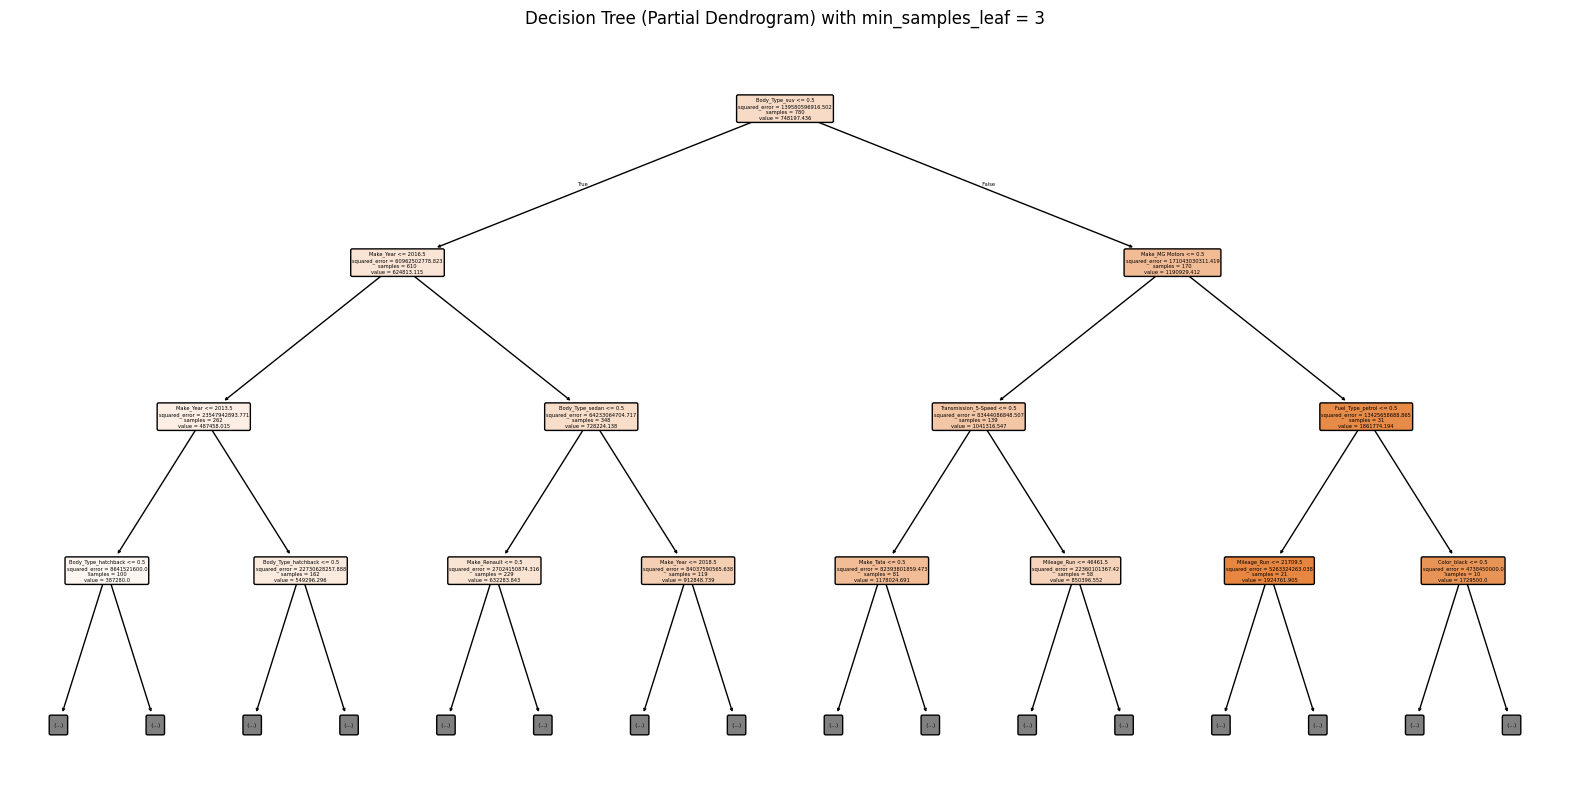

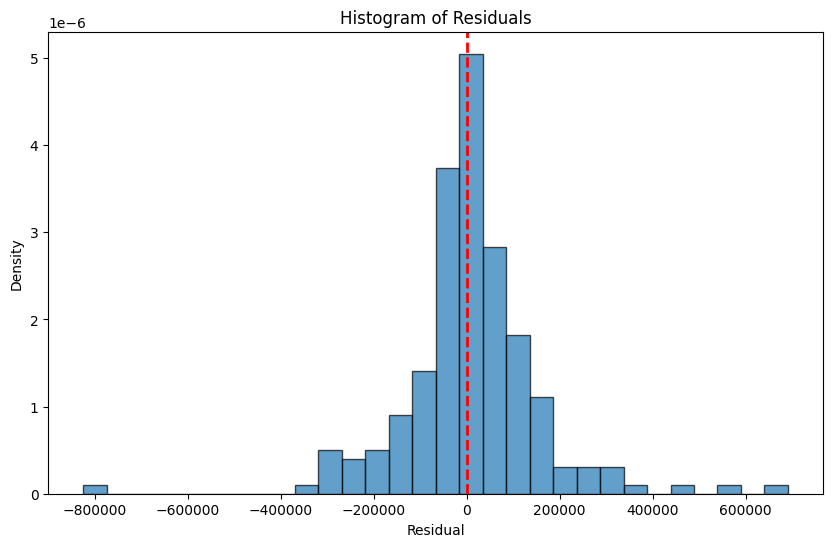

In [17]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree (Partial Dendrogram) with min_samples_leaf = 3")
plt.show()

# Compute residuals from the test set predictions
residuals = y_test - y_pred

# Plot the histogram of residuals
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30, density=True, alpha=0.7, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Density")
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)  # Use the imported r2_score function
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("\nLinear Regression Performance:")
print(f" - R^2 on test set: {r2_lin:.4f}")
print(f" - RMSE on test set: {rmse_lin:.4f}")


Linear Regression Performance:
 - R^2 on test set: 0.8203
 - RMSE on test set: 143575.1966


The linear regresion performs better on the test set with the higher R^2 and lower RMSE. This could be due to underlying relationships btwn the predictors and the target as well as overfitting. 

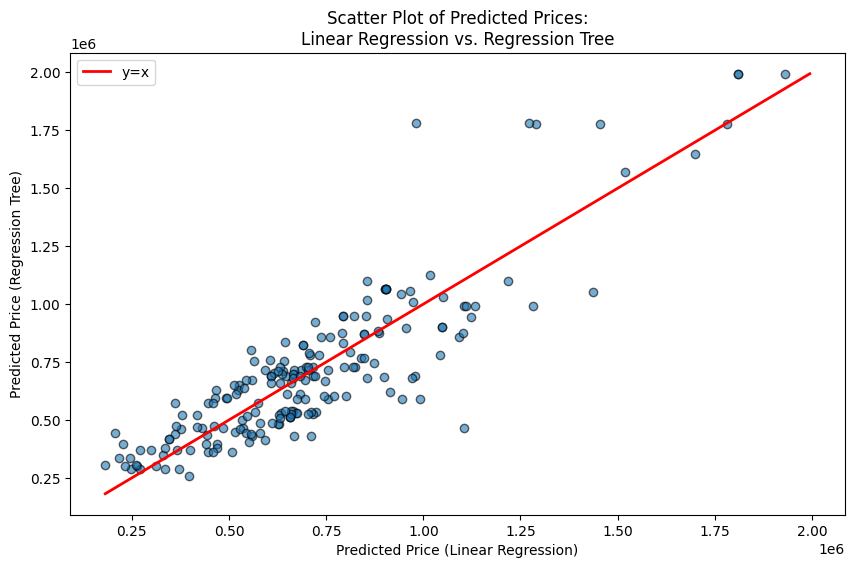

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lin, y_pred_tree, alpha=0.6, edgecolors='k')
plt.xlabel("Predicted Price (Linear Regression)")
plt.ylabel("Predicted Price (Regression Tree)")
plt.title("Scatter Plot of Predicted Prices:\nLinear Regression vs. Regression Tree")
# Add a y=x line for reference
min_val = min(y_pred_lin.min(), y_pred_tree.min())
max_val = max(y_pred_lin.max(), y_pred_tree.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='y=x')
plt.legend()
plt.show()

A lot of points cluster at the y=x line, which suggest that the regression tree and linear regression model produce similar estimates. However, they scatter around this line, which indicates that the models do not always produce identical predictions. At lower predicted values, the points appear close to the line, meaning that for lower-priced cars.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?